# 1-dimensional continuous data BO test using BayBE

In [1]:
from baybe.targets import NumericalTarget
from baybe.objective import Objective

target = NumericalTarget(
    name="Yield",
    mode="MAX",
)
objective = Objective(mode="SINGLE", targets=[target])

c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\baybe\telemetry.py:222: UserWarning: WARNING: BayBE Telemetry endpoint https://public.telemetry.baybe.p.uptimize.merckgroup.com:4317 cannot be reached. Disabling telemetry. The exception encountered was: ConnectionError, HTTPConnectionPool(host='verkehrsnachrichten.merck.de', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x000001B9DC8E81F0>: Failed to resolve 'verkehrsnachrichten.merck.de' ([Errno 11001] getaddrinfo failed)"))
  warnings.warn(
c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from baybe.parameters import NumericalContinuousParameter

parameters = [
    NumericalContinuousParameter('schwefel1', bounds=(-500,500)),
]


In [3]:
from baybe.recommenders import (
    SequentialGreedyRecommender, 
    SequentialMetaRecommender, 
    RandomRecommender
)

recommender = SequentialGreedyRecommender()

In [4]:
from baybe.searchspace import SearchSpace

searchspace = SearchSpace.from_product(parameters)

In [5]:
from baybe import Campaign

campaign = Campaign(searchspace, objective, recommender)

In [9]:
import pandas as pd
df = pd.read_csv('seed_data.csv')
df

,schwefel1,Yield
0,356.991347,403.045423
1,-309.004730,123.758482
2,-55.674007,470.423643


In [10]:
from schwefel_functions import schwefel_1d

df['Yield'] = df['schwefel1'].apply(schwefel_1d)
df

,schwefel1,Yield
0,356.991347,403.045423
1,-309.004730,123.758482
2,-55.674007,470.423643


In [11]:
campaign.add_measurements(df)

<Axes: xlabel='schwefel1', ylabel='Yield'>

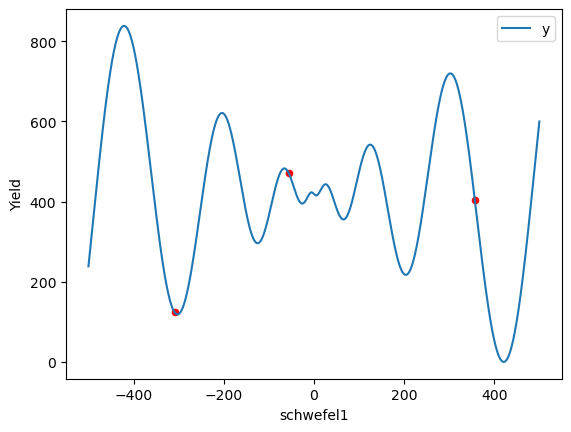

In [39]:
import numpy as np
import matplotlib.pyplot as plt

example_data = pd.DataFrame(columns = ['x', 'y'])

example_data['x'] =  np.linspace(-500,500,5000)
example_data['y'] = example_data['x'].apply(schwefel_1d)

fig, ax  = plt.subplots()
example_data.plot('x', 'y', ax=ax)
df.plot.scatter('schwefel1', 'Yield', ax=ax, c='red')

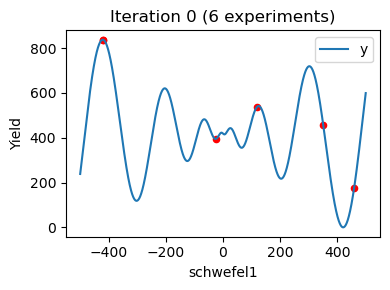

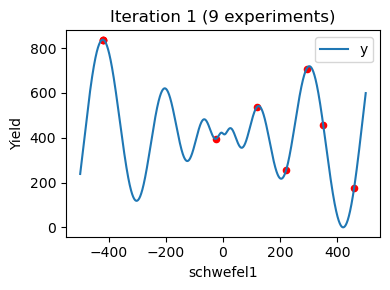

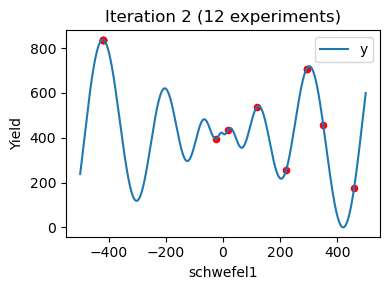

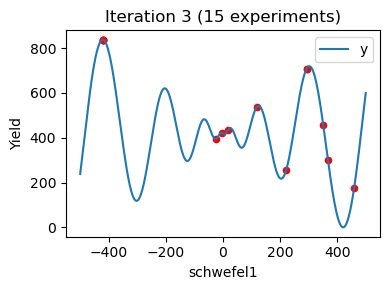

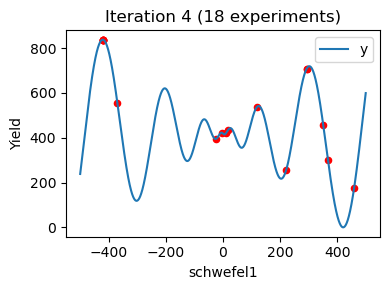

In [49]:
from copy import deepcopy
df_cumulative = deepcopy(df)
for iteration in range(5):
    df = campaign.recommend(batch_size=3)
    df['Yield'] = df['schwefel1'].apply(schwefel_1d)
    campaign.add_measurements(df)
    df_cumulative = pd.concat([df_cumulative, df])
    fig, ax  = plt.subplots(figsize=(4,3))
    ax.set_title(f'Iteration {iteration} ({len(df_cumulative)} experiments)')
    example_data.plot('x', 'y', ax=ax)
    df_cumulative.plot.scatter('schwefel1', 'Yield', ax=ax, c='red')
    plt.tight_layout()
    plt.show()